Name : Talole Prajakta Vijay
Project : Bribe Report Scanner

# Bribe_report_scanner

'''Problem Statement :  Problem statement: -

This dataset contains information about the bribes taken from public. All the information in this dataset
is submitted by public of India. It contains information about department which did the corruption, date,
location, amount, views of their post and amount they were forced to give.


Find the following observation: -
1 - Most Bribes are paid in which cities?
2- Most Bribes are paid in which states?
3- Which department gets paid the most bribe?
4-Departments which take most bribe on average and overall.
5-Bribes paid by days of the month
6-Bribes paid by days of the days of week
7-Bribes paid by Years
8-Conclusion
'''
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

C:\Users\Redmi\New folder\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv('Bribe_report.csv')
df=df1.copy()

In [3]:
df.head(100)

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000
...,...,...,...,...,...,...
95,Bribe taken by traffic polive,4/9/2020,"Howrah,WestBengal",Driving Licenses and Tests,1134,2000
96,CDSCO FOR DIAGNOSTIC KIT APPROVAL,1/9/2020,"Ambala,Haryana",Drugs License,1096,200000
97,DISTRICT DRUG INSPECTOR NEEDS ANNUAL RENEWAL FEES,1/9/2020,"Ambala,Haryana",Drugs License,1082,100000
98,Quarantine issues at the airport,30-08-20,"NewDelhi,Delhi",Visa,1521,5000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


In [5]:
r,c=df.shape
print('The dataset has ',r,' rows and ',c,' columns.' )

The dataset has  3473  rows and  6  columns.


In [6]:
df.isnull().sum()

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [7]:
df['Department'].value_counts()

Others                                    472
Police Verification for Passport          266
Traffic Violations                        236
Birth Certificate                         155
Traffic Fines, Penalties, Rules           101
                                         ... 
Inspection of Vehicles after Accidents      1
License Renewal                             1
Title Deed                                  1
Extra Charges                               1
Enrolment for Aadhaar Card                  1
Name: Department, Length: 367, dtype: int64

In [8]:
df[df['Department'].isnull()].head(10)

,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),15-05-20,"Raipur,Chhattisgarh",NaN,1565,200000
202,Reg Husband mohamed asik given amount to socia...,25-02-20,"Madurai,TamilNadu",NaN,1848,5000
230,For Staying on the road side with motorcycle,5/2/2020,"Bangalore,Karnataka",NaN,1816,200
260,Paid 500 Rs bribe at Nizamuddin Station Saraik...,10/1/2020,"NewDelhi,Delhi",NaN,1926,500
278,FSO demanded for bribe through his helper,31-12-19,"Silvassa,DadraandNagarHaveli",NaN,881,15000
300,Bribe for online motation,10/12/2019,"Gaya,Bihar",NaN,2138,30000


In [9]:
df['Department'].fillna('Others',inplace=True)

In [10]:
df.describe(include='all')

,Title,Date,Location,Department,Views,Amount(INR)
count,3473,3473,3473,3473,3473.000000,3.473000e+03
unique,3282,1334,510,367,NaN,NaN
top,Passport verification,7/11/2015,"Bangalore,Karnataka",Others,NaN,NaN
freq,10,37,769,516,NaN,NaN
mean,NaN,NaN,NaN,NaN,3379.405701,3.331083e+04
std,NaN,NaN,NaN,NaN,1540.854884,1.508203e+05
min,NaN,NaN,NaN,NaN,463.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,2081.000000,3.300000e+02
50%,NaN,NaN,NaN,NaN,3272.000000,1.200000e+03
75%,NaN,NaN,NaN,NaN,4522.000000,8.000000e+03


In [11]:
df.describe(include=object)

,Title,Date,Location,Department
count,3473,3473,3473,3473
unique,3282,1334,510,367
top,Passport verification,7/11/2015,"Bangalore,Karnataka",Others
freq,10,37,769,516


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3473 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


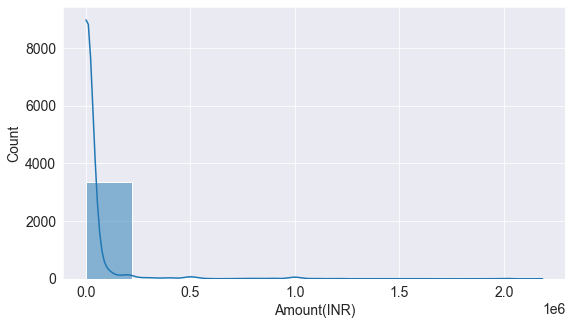

In [13]:
sns.histplot(df['Amount(INR)'],kde=True,bins=10);
#data is highly skewed.

<AxesSubplot:xlabel='Amount(INR)', ylabel='Proportion'>

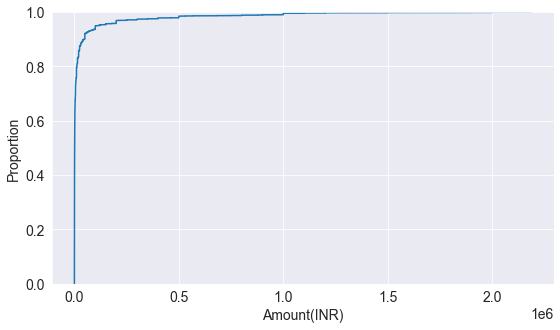

In [14]:
import seaborn as sns
sns.ecdfplot(data=df['Amount(INR)'])      # empirical Commutative distribution

In [15]:
#Data Cleaning and Column Split 
print(df['Amount(INR)'].min())


1


In [16]:
df['Amount(INR)'].quantile(0.80)

12000.0

In [17]:
# Switching to only relevant data
df=df[df['Amount(INR)']<df['Amount(INR)'].quantile(0.80)]


In [18]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
6,Bribe paid to VAO for patta transfer,10/10/2020,"Coimbatore,TamilNadu",Others,1129,5000


In [19]:
df.shape

(2773, 6)

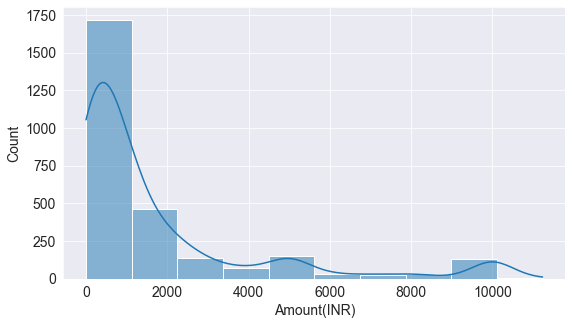

In [20]:
sns.histplot(df['Amount(INR)'],kde=True,bins=10);

In [21]:
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [22]:
### Exploring
df.Department.unique()

array(['Births, Family and Care', 'Vehicle Insurance',
       'Driving and Transport Business', 'Driving Licenses and Tests',
       'Others', 'Police Clearance Certificate',
       'Registrations and Licenses', 'Building and Housing',
       'Traffic Fines, Penalties, Rules', 'Excise',
       'Policies and Procedures', 'Loan Sanctioning', 'Court Related',
       'Verification and Certificates', 'Visa', 'Khata',
       'College Leaving Certificate', 'Tax and Permits', 'Autorickshaws',
       'Certificates', 'Caste Certificate', 'Dates for Hearing',
       'Aadhaar Card Process', 'Excess Baggage', 'Traffic Violations',
       'Bill Payment', 'Passport Status and Delivery',
       'Land Registration', 'Government Personnel', 'Government Schemes',
       'Loans', 'Marriage Certificate and Registration',
       'Police Harassment', 'Background Verification', 'Services',
       'FIR and Complaints', 'Change of Tariff in Domestic to Commercial',
       'Traveling without Ticket', 'Disability

In [23]:
df[['City','Province']]=df['Location'].str.split(',',expand=True)

In [24]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR),City,Province
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
6,Bribe paid to VAO for patta transfer,10/10/2020,"Coimbatore,TamilNadu",Others,1129,5000,Coimbatore,TamilNadu


In [25]:
#There is no correlation between views and amount.

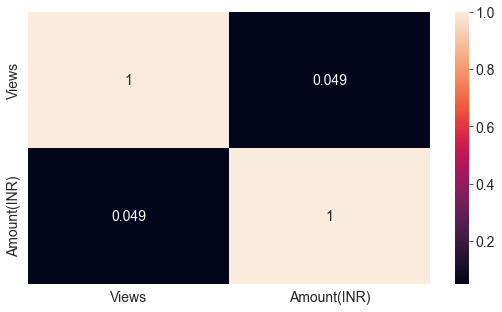

In [26]:
sns.heatmap(df.corr(), annot=True);

## Most Bribes are paid in which cities?

In [27]:
most_bribe_area=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False)

In [28]:
most_bribe_area

,count,sum
City,,
Bangalore,611,1127768
NewDelhi,194,303320
Chennai,124,229328
Pune,111,162812
Mumbai,87,174596
...,...,...
Kaithal,1,200
Kailasahar,1,1200
Junagadh,1,500


In [29]:
most_bribe_area.reset_index(inplace=True)

In [30]:
most_bribe_area.head(100)

,City,count,sum
0,Bangalore,611,1127768
1,NewDelhi,194,303320
2,Chennai,124,229328
3,Pune,111,162812
4,Mumbai,87,174596
...,...,...,...
95,Margao,4,11700
96,Jaunpur,4,5323
97,Ulhasnagar,4,1700
98,Pollachi,4,7100


In [31]:
most_bribe_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    463 non-null    object
 1   count   463 non-null    int64 
 2   sum     463 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.0+ KB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773 entries, 0 to 3471
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2773 non-null   object
 1   Date         2773 non-null   object
 2   Location     2773 non-null   object
 3   Department   2773 non-null   object
 4   Views        2773 non-null   int64 
 5   Amount(INR)  2773 non-null   int64 
 6   City         2773 non-null   object
 7   Province     2773 non-null   object
dtypes: int64(2), object(6)
memory usage: 195.0+ KB


<AxesSubplot:xlabel='count', ylabel='City'>

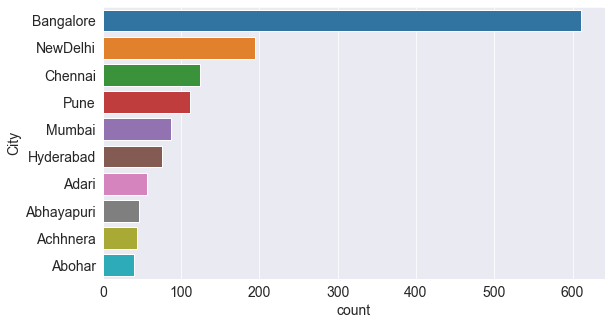

In [33]:
#Most Bribes are paid in which states?
sns.barplot(y=most_bribe_area.head(10)['City'],x=most_bribe_area.head(10)['count'])

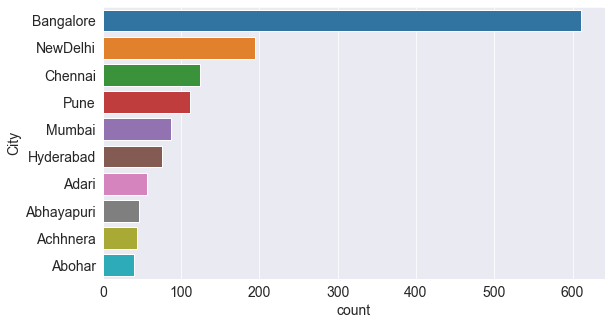

In [34]:
most_bribe_city=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=most_bribe_city.index,x=most_bribe_city['count']);

## MOST BRIBES ARE PAID IN BANGLORE

##  Most Bribes are paid in which states?

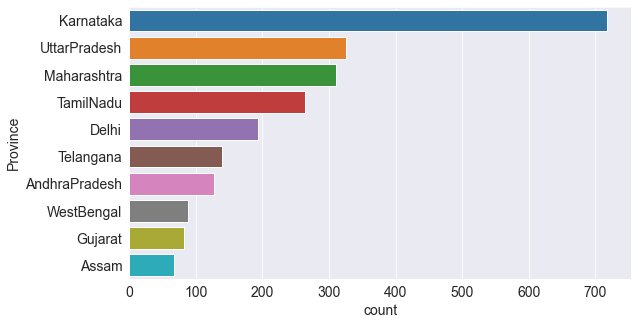

In [35]:
most_bribe_province=df.groupby(['Province'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=most_bribe_province.index,x=most_bribe_province['count']);

## MOST BRIBES ARE PAID IN KARNATAKA STATE

## Which department gets paid the most bribe?

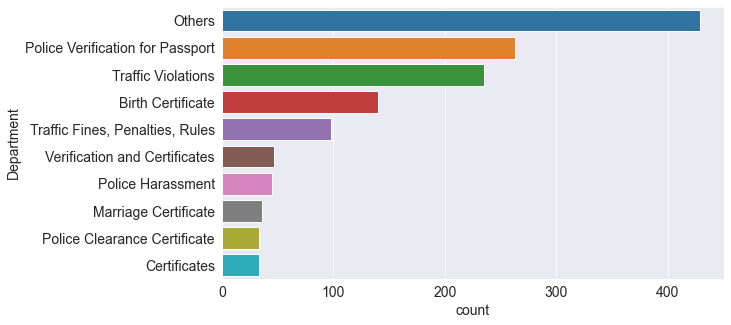

In [36]:
depart_freq=df.groupby('Department')['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=depart_freq.index,x=depart_freq['count']);


## MOST BRIBES ARE TAKEN IN POLICE VERIFICATION FOR PASSPORT DEPARTMENT

In [37]:
#Traffic taking the top of lists

In [38]:
#Traffic is higher as expected. Notice there are two bars of traffic.

## Departments which take most bribe on average and overall.

In [39]:
depart_sum=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='sum',ascending=False).head(10)
depart_sum

,mean,sum
Department,,
Others,1706.116550,731924
Police Verification for Passport,875.608365,230285
Traffic Violations,742.378723,174459
Birth Certificate,987.228571,138212
Police Harassment,2267.777778,102050
Customs Check and Clearance,3326.400000,99792
"Traffic Fines, Penalties, Rules",911.928571,89369
Registration of Property,5182.352941,88100
Land Registration,5285.333333,79280


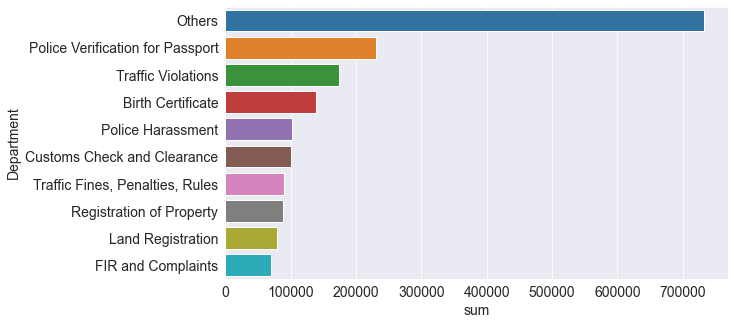

In [40]:
sns.barplot(y=depart_sum.index,x=depart_sum['sum']);

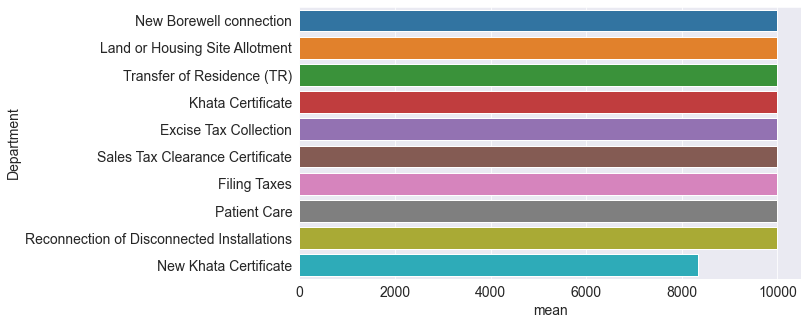

In [41]:
depart_mean=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='mean',ascending=False).head(10)
depart_mean
sns.barplot(y=depart_mean.index,x=depart_mean['mean']);

In [42]:
#Time Series Analysis

In [43]:
df_day=df[["Amount(INR)",'Date']].copy()
df_day.head()


,Amount(INR),Date
0,400,14-10-20
1,350,13-10-20
2,100,13-10-20
3,100,13-10-20
6,5000,10/10/2020


In [44]:
df_day.tail()

,Amount(INR),Date
3466,200,30-10-15
3468,33,30-10-15
3469,10,30-10-15
3470,500,30-10-15
3471,800,30-10-15


In [45]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773 entries, 0 to 3471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Amount(INR)  2773 non-null   int64 
 1   Date         2773 non-null   object
dtypes: int64(1), object(1)
memory usage: 65.0+ KB


In [46]:
# convert the date in datetime data type
df_day["Date"] = pd.to_datetime(df['Date'])


In [47]:
df_day["Date"]

0      2020-10-14
1      2020-10-13
2      2020-10-13
3      2020-10-13
6      2020-10-10
          ...    
3466   2015-10-30
3468   2015-10-30
3469   2015-10-30
3470   2015-10-30
3471   2015-10-30
Name: Date, Length: 2773, dtype: datetime64[ns]

In [48]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773 entries, 0 to 3471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Amount(INR)  2773 non-null   int64         
 1   Date         2773 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 65.0 KB


In [49]:
df1_day=df_day.copy()

In [50]:
df1_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773 entries, 0 to 3471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Amount(INR)  2773 non-null   int64         
 1   Date         2773 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 65.0 KB


In [51]:
# extration of  day_name,day,week,year,month,dayofweek

In [52]:
#dt.day_name()
#dt.day
#dt.week
#dt.year
#dt.month
#dt.dayofweek

In [53]:
"""
# Extract Datetime (InvoiceDate) into Day
import datetime as dt

df_day["Day"] = df_day['Date'].dt.day
df_day

df_day["Day_name"] = df_day['Date'].dt.day_name()

#dt.day_name()
#dt.day
#dt.week
#dt.year
#dt.month
#dt.dayofweek
"""

'\n# Extract Datetime (InvoiceDate) into Day\nimport datetime as dt\n\ndf_day["Day"] = df_day[\'Date\'].dt.day\ndf_day\n\ndf_day["Day_name"] = df_day[\'Date\'].dt.day_name()\n\n#dt.day_name()\n#dt.day\n#dt.week\n#dt.year\n#dt.month\n#dt.dayofweek\n'

In [54]:
#df_day['Date'].apply(lambda x : int(x.year))

In [55]:
df_day["Day_of_month"] = df_day['Date'].apply(lambda x :int(x.day))
df_day

,Amount(INR),Date,Day_of_month
0,400,2020-10-14,14
1,350,2020-10-13,13
2,100,2020-10-13,13
3,100,2020-10-13,13
6,5000,2020-10-10,10
...,...,...,...
3466,200,2015-10-30,30
3468,33,2015-10-30,30
3469,10,2015-10-30,30
3470,500,2015-10-30,30


In [56]:
df_day.head()

,Amount(INR),Date,Day_of_month
0,400,2020-10-14,14
1,350,2020-10-13,13
2,100,2020-10-13,13
3,100,2020-10-13,13
6,5000,2020-10-10,10


In [57]:
#df_day["Day_new_method"] = df_day['Date'].dt.day_name()
#df_day

In [58]:
df_day["Week_of_year"]=df_day["Date"].apply(lambda x : int(x.week))
df_day["Year"]=df_day["Date"].apply(lambda x : int(x.year))
df_day["Month"]=df_day["Date"].apply(lambda x : int(x.month))
df_day['Day_of_week']=df_day['Date'].apply(lambda x : int(x.dayofweek))

In [59]:
df_day['Day_of_week'].unique()

array([2, 1, 5, 3, 0, 6, 4], dtype=int64)

In [60]:
df_day['Day_name']=df_day['Date'].apply(lambda x : x.day_name())

In [61]:
df_day.head()

,Amount(INR),Date,Day_of_month,Week_of_year,Year,Month,Day_of_week,Day_name
0,400,2020-10-14,14,42,2020,10,2,Wednesday
1,350,2020-10-13,13,42,2020,10,1,Tuesday
2,100,2020-10-13,13,42,2020,10,1,Tuesday
3,100,2020-10-13,13,42,2020,10,1,Tuesday
6,5000,2020-10-10,10,41,2020,10,5,Saturday


In [62]:
"""
df_day["Day_of_month"]=df["Date"].dt.day
df_day["Week_of_year"]=df["Date"].dt.week
df_day["Year"]=df["Date"].dt.year
df_day["Month"]=df["Date"].dt.month
df_day['Day_of_week']=df['Date'].dt.dayofweek
"""

'\ndf_day["Day_of_month"]=df["Date"].dt.day\ndf_day["Week_of_year"]=df["Date"].dt.week\ndf_day["Year"]=df["Date"].dt.year\ndf_day["Month"]=df["Date"].dt.month\ndf_day[\'Day_of_week\']=df[\'Date\'].dt.dayofweek\n'

## Bribes paid by days of the month

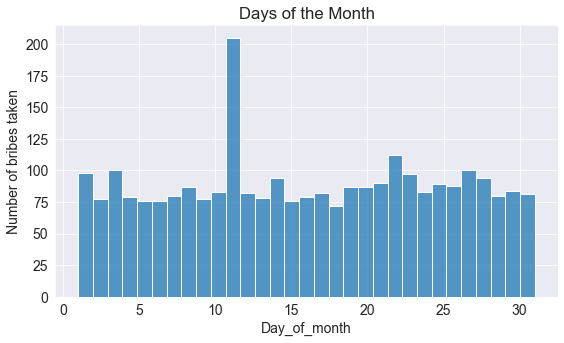

In [63]:
sns.histplot(data=df_day["Day_of_month"],bins=31)
plt.ylabel("Number of bribes taken")
plt.title("Days of the Month");

## Bribes paid by days of the week

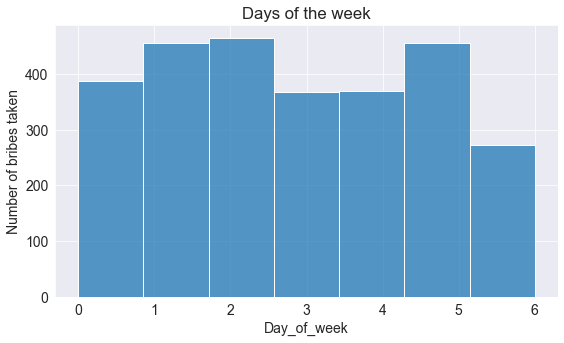

In [64]:
sns.histplot(data=df_day["Day_of_week"],bins=7)
plt.ylabel("Number of bribes taken")
plt.title("Days of the week");

## Bribes paid by Years

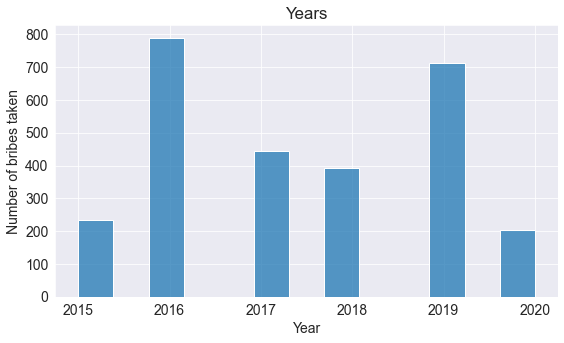

In [65]:
sns.histplot(data=df_day["Year"])
plt.ylabel("Number of bribes taken")
plt.title("Years");

## MOSt BRIBES ARE TAKEN IN YEAR 2016

## Bribes paid by month

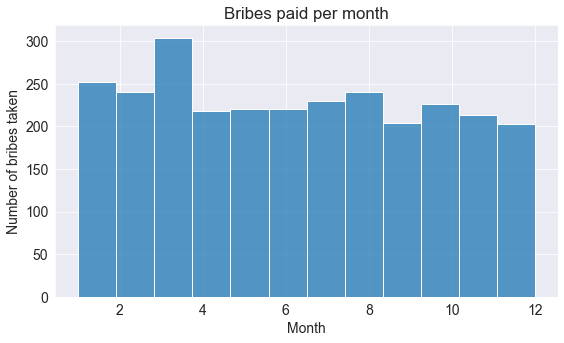

In [66]:
sns.histplot(data=df_day["Month"],bins=12)
plt.ylabel("Number of bribes taken")
plt.title("Bribes paid per month");

## MOST BRIBES ARE TAKEN IN MARCH MONTH

## Bribes taken by days of the week

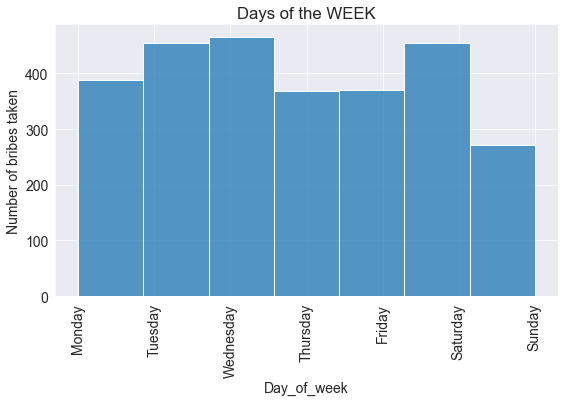

In [67]:
sns.histplot(data=df_day["Day_of_week"],bins=7)
plt.ylabel("Number of bribes taken")
plt.title("Days of the WEEK")
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90);

## MOST BRIBES ARE TAKEN ON WEDNESDAY

In [68]:
#It is intresting to note that On Sunday bribes are paid less often

<AxesSubplot:>

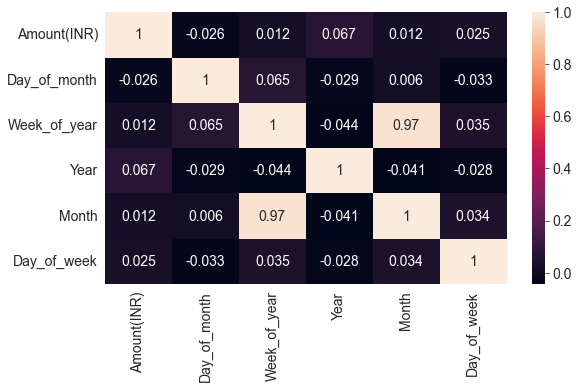

In [69]:
sns.heatmap(df_day.corr(),annot=True)

In [70]:
"""
Conclusion :

In Banglore, the highest and most numbers of bribes are paid.
Karnataka is the state where Bribes are paid the most.
The POlice verification for passport Department gets has the highest bribes taking count.
Bribes are taken less frequently on Sundays.
Highest number of bribes taking cases are reported in 2016 and 2019.

"""

'\nConclusion :\n\nIn Banglore, the highest and most numbers of bribes are paid.\nKarnataka is the state where Bribes are paid the most.\nThe POlice verification for passport Department gets has the highest bribes taking count.\nBribes are taken less frequently on Sundays.\nHighest number of bribes taking cases are reported in 2016 and 2019.\n\n'